In [1]:
import numpy as np
import matplotlib.pyplot as plt
import probfit
import iminuit
import math
from statnight.utils.wrappers import ModelWrapper, LossFunctionWrapper, MinuitWrapper
from statnight.parameters import Observable, Variable, Constant, POI
from statnight.utils.stats import integrate1d
from statnight.hypothesis import Hypothesis
from statnight.hypotest import Discovery
from statnight.calculators import AsymptoticCalculator

## Signal + background fit:

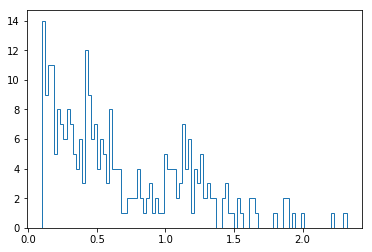

In [2]:
bounds = (0.1, 3.0)

# Data and signal

np.random.seed(0)
tau = -2.0
beta = -1/tau
data = np.random.exponential(beta, 300)
peak = np.random.normal(1.2, 0.1, 40)
data = np.concatenate((data,peak))
data = data[(data > bounds[0]) & (data < bounds[1])]

plt.hist(data, bins=100, histtype='step');

In [3]:
bkg_pdf = probfit.Normalized(probfit.exponential, bounds)
sig_pdf = probfit.Normalized(probfit.gaussian, bounds)
bkg_pdf_ext = probfit.Extended(bkg_pdf, "Nbkg")
sig_pdf_ext = probfit.Extended(sig_pdf, "Nsig")
tot_pdf = probfit.AddPdf(bkg_pdf_ext, sig_pdf_ext)

In [4]:
tot_model = ModelWrapper(tot_pdf)

tot_model.add_obs(Observable("x", range = bounds))

mean  = Constant("mean",  value=1.2)
sigma = Constant("sigma", value= 0.1)
Nsig  = Variable("Nsig",  range=(-10,len((data))),   initvalue= 20.0,       initstep=1.0)
tau   = Variable("tau",   range=(0.1, 5.0), initvalue=0.5, initstep=0.05)
Nbkg  = Variable("Nbkg",  range=(0,len((data))*1.1), initvalue= len(data), initstep=1.0)

tot_model.add_vars(mean, sigma, Nsig, tau, Nbkg)

tot_model.extended = True

In [5]:
LH = LossFunctionWrapper(probfit.UnbinnedLH(tot_model, data, extended=True, extended_bound=bounds))

In [6]:
minuit = MinuitWrapper(LH)

In [7]:
minuit.migrad();

FCN = -1219.4519050188142 
 TOTAL NCALL = 77 
 NCALLS = 77 
 
 
 EDM = 1.0437445014354589e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,tau,1.94338,0.142008,,,0.1,5,No
1,Nbkg,251.048,16.7984,,,0,314.6,No
2,mean,1.2,1,,,,,Yes
3,sigma,0.1,1,,,,,Yes
4,Nsig,34.9893,8.23037,,,-10,286,No


In [8]:
def plotfitresult(pdf, bounds, nbins, *args):
    x = np.linspace(bounds[0], bounds[1], nbins)
    bin_centers = x[:-1] + np.diff(x)/2.
    y = np.zeros(bin_centers.shape)
    
    for i in range(nbins-1):
        y[i] = integrate1d(pdf, (x[i],x[i+1]), 100, *args)
        
    plt.plot(bin_centers, y, "-r")      

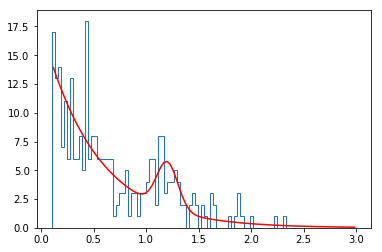

In [9]:
nbins = 100
fit_result = minuit.values.values()
plt.hist(data, bins=nbins, histtype='step', range=bounds);
plotfitresult(tot_model, bounds, nbins, *fit_result)

## Discovery significance.

In [10]:
null_hypothesis = Hypothesis(LH, POI("Nsig", 0))

In [11]:
alt_hypothesis = Hypothesis(LH, POI("Nsig", minuit.values["Nsig"]))

In [12]:
calc = AsymptoticCalculator()

In [13]:
discovery_test = Discovery(null_hypothesis, alt_hypothesis, calc)

In [14]:
discovery_test.result();

Get fit best values for nuisance parameters for the alternative hypothesis!


FCN = -1222.769985908881 
 TOTAL NCALL = 55 
 NCALLS = 55 
 
 
 EDM = 5.13197763341933e-07 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,tau,1.839,0.144911,,,0.1,5,No
1,Nbkg,255.804,16.6843,,,0,314.6,No
2,mean,1.2,1,,,,,Yes
3,sigma,0.1,1,,,,,Yes
4,Nsig,34.9893,1,,,,,Yes


p_value for the Null hypothesis = 7.233694188091278e-08
Significance = 5.259212174576914
CL_b = 7.233694188091278e-08
CL_s+b = 0.44051607947884674
